In [1]:
#Essential Constants
from scipy.constants import h, c, hbar, u, k

#Imports from other script/s
from ipynb.fs.full.Conversions_Epimetheus import * #Conversion Doc
from ipynb.fs.full.Atomic_Mass_Key import element #Mass Key File
from ipynb.fs.full.Epi_Functions import * #All Functions

#General Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import itertools
import pandas as pd

In [2]:
#Import Desired PES
#from ipynb.fs.full.O3_PES_via_02BaChCo import PES
from ipynb.fs.full.O3_PES_fortran_JT import PES

In [3]:
#Import Desired Data
HITRAN2016_link = "https://hitran.org/results/640f13a1.out"
if type(HITRAN2016_link) == str:
    HITRAN2016_data = pd.read_csv(HITRAN2016_link, header=None, skiprows=None, sep="\s+")     
    HITRAN2016_data.to_csv("O3_686_SPEC_HITRAN2016.csv")
    
    HITRAN2016_freq = HITRAN2016_data.loc[:,0]
    HITRAN2016_freq = np.array(HITRAN2016_freq)
    
    HITRAN2016_intensity = HITRAN2016_data.loc[:,1]
    HITRAN2016_intensity = np.array(HITRAN2016_intensity)
    HITRAN2016_intensity = np.divide(HITRAN2016_intensity, sum(HITRAN2016_intensity))
    
elif HITRAN2016_link == 1: 
    HITRAN2016_data = pd.read_csv("O3_686_SPEC_HITRAN2016.csv", sep=",", header=None, skiprows=1)

    HITRAN2016_freq = HITRAN2016_data.loc[:,1]
    HITRAN2016_freq = np.array(HITRAN2016_freq)
    
    HITRAN2016_intensity = HITRAN2016_data.loc[:,2]
    HITRAN2016_intensity = np.array(HITRAN2016_intensity)
    HITRAN2016_intensity = np.divide(HITRAN2016_intensity, sum(HITRAN2016_intensity))

### Manual Inputs

In [4]:
#Temperature
T = 300

In [5]:
#Positions/Bond Lengths/Angles
r1 = 1.28
r2 = r1
alpha = 116.78 
#Fortran values
r1 =1.27200
r2 = r1
alpha =116.7800
coord = coord_triatomic(alpha, r1, r2)

In [6]:
mass = ((element["O"] * u * kg_to_me), 
            (element["O-18"] * u * kg_to_me), 
            (element["O"] * u * kg_to_me))

In [7]:
B, I, COMcoord = rot_inertia_rcom(coord, mass)

### Calculations 

In [8]:
Key, Pos =  Key_and_Pos(coord)

In [9]:
PES_func = PES(Key)

In [10]:
Hess = Hess_CART(Key, Pos, PES)

In [11]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [12]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

Fundamental frequencies [cm]^-1 =
[1104.89213234 1053.49264824  707.08112995   26.94136992]


In [13]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [14]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [15]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES)

In [16]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES)

In [17]:
sigma = sigma_ij(displace_val, cubic)


In [18]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

Corrected modes = [1092.39803299] vs OG = 1104.8924892640046
Corrected modes = [1013.00884393] vs OG = 1053.4929885573492
Corrected modes = [694.45595574] vs OG = 707.0813583605195


In [19]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

In [20]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [23]:
asy_k_value = asy_k(A_rot, B_rot, C_rot)

In [24]:
F_J_O = F_J(A_rot, B_rot, C_rot, J_max_arr)
F_J_P = F_J(A_rot, B_rot, C_rot, J_max_arr)
F_J_Q = F_J(A_rot, B_rot, C_rot, J_max_arr)
F_J_R = F_J(A_rot, B_rot, C_rot, J_max_arr)
F_J_S = F_J(A_rot, B_rot, C_rot, J_max_arr)
##

In [25]:
v_O_m1, v_O_m1_J_index = asytop_v_O(J_max_arr, deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
anharmv_O_m1 = v_O_m1
#%store anharmv_O_m1
v_P_m1, v_P_m1_J_index = asytop_v_P(J_max_arr, deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
anharmv_P_m1 = v_P_m1
#%store anharmv_P_m1
v_Q_m1, v_Q_m1_J_index = asytop_v_Q(J_max_arr, deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
anharmv_Q_m1 = v_Q_m1
#%store anharmv_Q_m1
v_R_m1, v_R_m1_J_index = asytop_v_R(J_max_arr, deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
anharmv_R_m1 = v_R_m1
#%store anharmv_R_m1
v_S_m1, v_S_m1_J_index = asytop_v_S(J_max_arr, deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
anharmv_S_m1 = v_S_m1
#%store anharmv_S_m1
##

In [26]:
v_O_m2, v_O_m2_J_index = asytop_v_O(J_max_arr, deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
anharmv_O_m2 = v_O_m2
#%store anharmv_O_m2
v_P_m2, v_P_m2_J_index = asytop_v_P(J_max_arr, deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
anharmv_P_m2 = v_P_m2
#%store anharmv_P_m2
v_Q_m2, v_Q_m2_J_index = asytop_v_Q(J_max_arr, deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
anharmv_Q_m2 = v_Q_m2
#%store anharmv_Q_m2
v_R_m2, v_R_m2_J_index = asytop_v_R(J_max_arr, deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
anharmv_R_m2 = v_R_m2
#%store anharmv_R_m2
v_S_m2, v_S_m2_J_index = asytop_v_S(J_max_arr, deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
anharmv_S_m2 = v_S_m2
#%store anharmv_S_m2
##

In [27]:
v_O_m3, v_O_m3_J_index = asytop_v_O(J_max_arr, deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
anharmv_O_m3 = v_O_m3
#%store anharmv_O_m3
v_P_m3, v_P_m3_J_index = asytop_v_P(J_max_arr, deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
anharmv_P_m3 = v_P_m3
#%store anharmv_P_m3
v_Q_m3, v_Q_m3_J_index = asytop_v_Q(J_max_arr, deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
anharmv_Q_m3 = v_Q_m3
#%store anharmv_Q_m3
v_R_m3, v_R_m3_J_index = asytop_v_R(J_max_arr, deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
anharmv_R_m3 = v_R_m3
#%store anharmv_R_m3
v_S_m3, v_S_m3_J_index = asytop_v_S(J_max_arr, deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
anharmv_S_m3 = v_S_m3
#%store anharmv_S_m3
##

In [28]:
Tran_I_v_all_m1 = Norm_I(F_J_O, v_O_m1_J_index, F_J_P, v_P_m1_J_index, F_J_Q, v_Q_m1_J_index,F_J_R, v_R_m1_J_index,F_J_S, v_S_m1_J_index, T, 0, 0.062)
##

In [29]:
Tran_I_v_all_m2 = Norm_I(F_J_O, v_O_m2_J_index, F_J_P, v_P_m2_J_index, F_J_Q, v_Q_m2_J_index,F_J_R, v_R_m2_J_index,F_J_S, v_S_m2_J_index, T, 1, 0.774)
##

In [30]:
Tran_I_v_all_m3 = Norm_I(F_J_O, v_O_m3_J_index, F_J_P, v_P_m3_J_index, F_J_Q, v_Q_m3_J_index,F_J_R, v_R_m3_J_index,F_J_S, v_S_m3_J_index, T, 0, 0.164)
##

In [31]:
Final_I = Fin_I(Tran_I_v_all_m1[0], Tran_I_v_all_m1[1], Tran_I_v_all_m1[2], Tran_I_v_all_m1[3], Tran_I_v_all_m2[0], Tran_I_v_all_m2[1], Tran_I_v_all_m2[2], Tran_I_v_all_m2[3],Tran_I_v_all_m2[4], Tran_I_v_all_m3[0], Tran_I_v_all_m3[1], Tran_I_v_all_m3[2], Tran_I_v_all_m3[3])

In [32]:
#All taken from "The ozone molecule: infrared and microwave spectroscopy"
# by J. M. Flaud and R. Bacis, 1997
exp_B = (3.290499, 0.445399, 0.391330)
exp_J_max_arr, exp_A_rot, exp_B_rot, exp_C_rot = J_max_func(exp_B, T)
exp_asy_k_value = asy_k(exp_A_rot, exp_B_rot, exp_C_rot)
exp_F_J_O = F_J(exp_A_rot, exp_B_rot, exp_C_rot, exp_J_max_arr)
exp_F_J_P = F_J(exp_A_rot, exp_B_rot, exp_C_rot, exp_J_max_arr)
exp_F_J_Q = F_J(exp_A_rot, exp_B_rot, exp_C_rot, exp_J_max_arr)
exp_F_J_R = F_J(exp_A_rot, exp_B_rot, exp_C_rot, exp_J_max_arr)
exp_F_J_S = F_J(exp_A_rot, exp_B_rot, exp_C_rot, exp_J_max_arr)

mode_100 = 1074.308
A_mode_100 = 3.290456
B_mode_100 = 0.442874
C_mode_100 = 0.388778
exp_v_O_m1, exp_v_O_m1_J_index = asytop_v_O(exp_J_max_arr, mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_v_P_m1, exp_v_P_m1_J_index = asytop_v_P(exp_J_max_arr, mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_v_Q_m1, exp_v_Q_m1_J_index = asytop_v_Q(exp_J_max_arr, mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_v_R_m1, exp_v_R_m1_J_index = asytop_v_R(exp_J_max_arr, mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_v_S_m1, exp_v_S_m1_J_index = asytop_v_S(exp_J_max_arr, mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)

mode_001 = 1008.453
A_mode_001 = 3.243580
B_mode_001 = 0.441597
C_mode_001 = 0.388332
exp_v_O_m2, exp_v_O_m2_J_index = asytop_v_O(exp_J_max_arr, mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_v_P_m2, exp_v_P_m2_J_index = asytop_v_P(exp_J_max_arr, mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_v_Q_m2, exp_v_Q_m2_J_index = asytop_v_Q(exp_J_max_arr, mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_v_R_m2, exp_v_R_m2_J_index = asytop_v_R(exp_J_max_arr, mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_v_S_m2, exp_v_S_m2_J_index = asytop_v_S(exp_J_max_arr, mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)


mode_010 = 696.306
A_mode_010 = 3.341551
B_mode_010 = 0.444188
C_mode_010 = 0.388901
exp_v_O_m3, exp_v_O_m3_J_index = asytop_v_O(exp_J_max_arr, mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_v_P_m3, exp_v_P_m3_J_index = asytop_v_P(exp_J_max_arr, mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_v_Q_m3, exp_v_Q_m3_J_index = asytop_v_Q(exp_J_max_arr, mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_v_R_m3, exp_v_R_m3_J_index = asytop_v_R(exp_J_max_arr, mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_v_S_m3, exp_v_S_m3_J_index = asytop_v_S(exp_J_max_arr, mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)

exp_Tran_I_v_all_m1 = Norm_I(exp_F_J_O, exp_v_O_m1_J_index, exp_F_J_P, exp_v_P_m1_J_index, exp_F_J_Q, exp_v_Q_m1_J_index, exp_F_J_R, exp_v_R_m1_J_index, exp_F_J_S, exp_v_S_m1_J_index, T, 0, 0.062)

exp_Tran_I_v_all_m2 = Norm_I(exp_F_J_O, exp_v_O_m2_J_index, exp_F_J_P, exp_v_P_m2_J_index, exp_F_J_Q, exp_v_Q_m2_J_index, exp_F_J_R, exp_v_R_m2_J_index, exp_F_J_S, exp_v_S_m2_J_index, T, 1, 0.774)

exp_Tran_I_v_all_m3 = Norm_I(exp_F_J_O, exp_v_O_m3_J_index, exp_F_J_P, exp_v_P_m3_J_index, exp_F_J_Q, exp_v_Q_m3_J_index, exp_F_J_R, exp_v_R_m3_J_index, exp_F_J_S, exp_v_S_m3_J_index, T, 0, 0.164)

exp_Final_I = Fin_I(exp_Tran_I_v_all_m1[0], exp_Tran_I_v_all_m1[1], exp_Tran_I_v_all_m1[2], exp_Tran_I_v_all_m1[3], exp_Tran_I_v_all_m2[0], exp_Tran_I_v_all_m2[1], exp_Tran_I_v_all_m2[2], exp_Tran_I_v_all_m2[3], exp_Tran_I_v_all_m2[4], exp_Tran_I_v_all_m3[0], exp_Tran_I_v_all_m3[1], exp_Tran_I_v_all_m3[2], exp_Tran_I_v_all_m3[3])


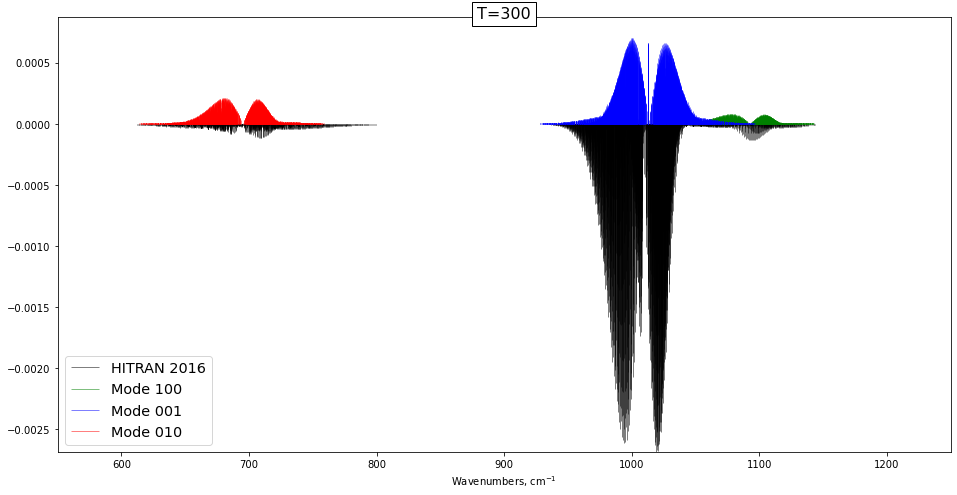

In [33]:
plt.figure(figsize=(16,8))
plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016", linewidth=.5)

plt.vlines(v_O_m1, 0, Final_I[0], "green",label="Mode 100", linewidth=.5)
plt.vlines(v_P_m1, 0, Final_I[1], "green", linewidth=.5)
plt.vlines(v_R_m1, 0, Final_I[2], "green", linewidth=.5)
plt.vlines(v_S_m1, 0, Final_I[3], "green", linewidth=.5)

plt.vlines(v_O_m2, 0, Final_I[4], "blue",label="Mode 001", linewidth=.5)
plt.vlines(v_P_m2, 0, Final_I[5], "blue", linewidth=.5)
plt.vlines(v_Q_m2, 0, Final_I[6], "blue", linewidth=.5)
plt.vlines(v_R_m2, 0, Final_I[7], "blue", linewidth=.5)
plt.vlines(v_S_m2, 0, Final_I[8], "blue", linewidth=.5)

plt.vlines(v_O_m3, 0, Final_I[9], "red",label="Mode 010", linewidth=.5)
plt.vlines(v_P_m3, 0, Final_I[10], "red", linewidth=.5)
plt.vlines(v_R_m3, 0, Final_I[11], "red", linewidth=.5)
plt.vlines(v_S_m3, 0, Final_I[12], "red", linewidth=.5)


plt.xlim(550, 1250)
plt.ylim(ymin=-max(HITRAN2016_intensity))
plt.xlabel("Wavenumbers, cm$^{-1}$")
plt.legend(loc = 'lower left', fontsize="x-large")
plt.annotate(f'T={T}', xy=(0.5, 0.96), xytext=(0.5, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'))

plt.savefig(f"EPI_O3_686 @ {T}.pdf")

plt.show()

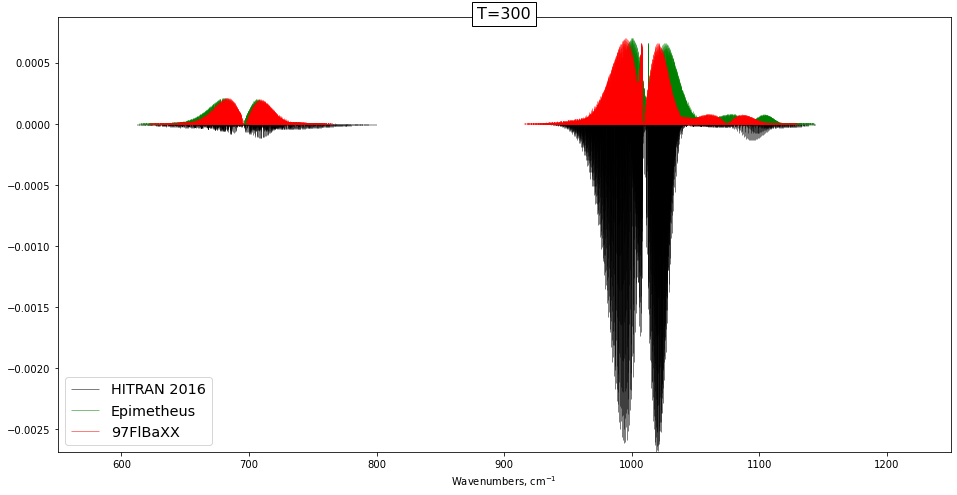

In [34]:
plt.figure(figsize=(16,8))
plt.vlines(HITRAN2016_freq,0, -HITRAN2016_intensity, color="k", label="HITRAN 2016", linewidth=.5)

plt.vlines(v_O_m1, 0, Final_I[0], "green", label= "Epimetheus", linewidth=.5)
plt.vlines(v_P_m1, 0, Final_I[1], "green", linewidth=.5)
plt.vlines(v_R_m1, 0, Final_I[2], "green", linewidth=.5)
plt.vlines(v_S_m1, 0, Final_I[3], "green", linewidth=.5)

plt.vlines(v_O_m2, 0, Final_I[4], "green", linewidth=.5)
plt.vlines(v_P_m2, 0, Final_I[5], "green", linewidth=.5)
plt.vlines(v_Q_m2, 0, Final_I[6], "green", linewidth=.5)
plt.vlines(v_R_m2, 0, Final_I[7], "green", linewidth=.5)
plt.vlines(v_S_m2, 0, Final_I[8], "green", linewidth=.5)

plt.vlines(v_O_m3, 0, Final_I[9], "green", linewidth=.5)
plt.vlines(v_P_m3, 0, Final_I[10], "green", linewidth=.5)
plt.vlines(v_R_m3, 0, Final_I[11], "green", linewidth=.5)
plt.vlines(v_S_m3, 0, Final_I[12], "green", linewidth=.5)

plt.vlines(exp_v_O_m1, 0, exp_Final_I[0], "red", label= "97FlBaXX", linewidth=.5)
plt.vlines(exp_v_P_m1, 0, exp_Final_I[1], "red", linewidth=.5)
plt.vlines(exp_v_R_m1, 0, exp_Final_I[2], "red", linewidth=.5)
plt.vlines(exp_v_S_m1, 0, exp_Final_I[3], "red", linewidth=.5)

plt.vlines(exp_v_O_m2, 0, exp_Final_I[4], "red", linewidth=.5)
plt.vlines(exp_v_P_m2, 0, exp_Final_I[5], "red", linewidth=.5)
plt.vlines(exp_v_Q_m2, 0, exp_Final_I[6], "red", linewidth=.5)
plt.vlines(exp_v_R_m2, 0, exp_Final_I[7], "red", linewidth=.5)
plt.vlines(exp_v_S_m2, 0, exp_Final_I[8], "red", linewidth=.5)

plt.vlines(exp_v_O_m3, 0, exp_Final_I[9], "red", linewidth=.5)
plt.vlines(exp_v_P_m3, 0, exp_Final_I[10], "red", linewidth=.5)
plt.vlines(exp_v_R_m3, 0, exp_Final_I[11], "red", linewidth=.5)
plt.vlines(exp_v_S_m3, 0, exp_Final_I[12], "red", linewidth=.5)

plt.xlim(550, 1250)
plt.ylim(ymin=-max(HITRAN2016_intensity))
plt.xlabel("Wavenumbers, cm$^{-1}$")
plt.legend(loc = 'lower left', fontsize="x-large")
plt.annotate(f'T={T}', xy=(0.5, 0.96), xytext=(0.5, .99), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'))

plt.savefig(f"EPI_O3_686_vs_lit @ {T}.pdf")

plt.show()